### 보스턴 주택 가격 데이터 셋

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수처리
plt.rcParams['axes.unicode_minus'] = False


import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
boston_df['PRICE'] = boston.target

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
import statsmodels.api as sm

In [19]:
X = boston_df[['CRIM','RM','LSTAT']]

In [20]:
X_data = sm.add_constant(X, has_constant="add")

In [21]:
target = boston_df[['PRICE']]

In [22]:
multi_model1 = sm.OLS(target,X_data) # 기본 선형 회귀 공식 결과 확인
fitted_multi_model1 = multi_model1.fit()

In [23]:
fitted_multi_model1.summary()
# R-squared : 결정 계수 ( 독립변수가 예측 결과에 영향을 주는 지수 ) - https://m.blog.naver.com/tlrror9496/222055889079
# coef : 회귀 계수
    # const : 절편

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.01e-112
Time:                        11:05:38   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared: 0.646 : 'CRIM','RM','LSTAT' 가 가격을 결정하는 점유율
- CRIM	-0.1029 : 가격이 1 단위 증가할 때 crim -0.10 감소
- RM	5.2170 : 가격이 1 단위 증가할 때 rm 5.2 증가
- LSTAT	-0.5785 : 가격이 1 단위 증가할 때 lstat -0.5 감소

#### 9개의 X (독립변수) 요소 추가

In [24]:
X_data2 = boston_df[['CRIM','RM','LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]

# 상수항 추가 - 회귀 모델을 계산하기 편하게 하기 위함
multi_model = X_data = sm.add_constant(X_data2, has_constant="add")

In [25]:
multi_model

,const,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,1.0,0.00632,6.575,4.98,396.90,296.0,65.2,18.0,0.538,2.31
1,1.0,0.02731,6.421,9.14,396.90,242.0,78.9,0.0,0.469,7.07
2,1.0,0.02729,7.185,4.03,392.83,242.0,61.1,0.0,0.469,7.07
3,1.0,0.03237,6.998,2.94,394.63,222.0,45.8,0.0,0.458,2.18
4,1.0,0.06905,7.147,5.33,396.90,222.0,54.2,0.0,0.458,2.18
...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,6.593,9.67,391.99,273.0,69.1,0.0,0.573,11.93
502,1.0,0.04527,6.120,9.08,396.90,273.0,76.7,0.0,0.573,11.93
503,1.0,0.06076,6.976,5.64,396.90,273.0,91.0,0.0,0.573,11.93
504,1.0,0.10959,6.794,6.48,393.45,273.0,89.3,0.0,0.573,11.93


In [26]:
# 선형모델
multi_model = sm.OLS(target, multi_model)

# 학습
fitted_multi_model2 = multi_model.fit()

In [27]:
# 학습결과 확인
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          5.76e-111
Time:                        11:05:44   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P>|t| : 0.00001 보다 작게 유지하는 것이 좋음 ( 작을수록 좋은 데이터 )

In [28]:
fitted_multi_model1.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [29]:
fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

- R-squared (0.662) :[['CRIM','RM','LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']] 독립 변수들이 가격에 영향을 미치는 점유율
    - 3개의 독립변수 ( 0.646 ), 9개의 독립변수 ( 0.662 ) 이기 때문에, 효율적인 측면에서 3개의 독립변수가 더 좋음

### 다중공선성 - 상관계수 / 산점도(Scatter / HeatMap ) 으로 확인

In [30]:
X_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


<AxesSubplot:>

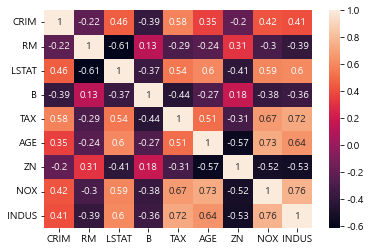

In [31]:
sns.heatmap(X_data2.corr(), annot=True)

### 다중공선성 확인 결과 NOX 변수의 상관계수가 문제가 있어 nox 변수 제거 후 모델 재 생성

In [32]:
X_data3 = X_data2.drop(columns='NOX')

In [33]:
# 상수항 추가 - 회귀 모델을 계산하기 편하게 하기 위함
multi_model3 = X_data = sm.add_constant(X_data3, has_constant="add")

# 선형모델
multi_model3 = sm.OLS(target, multi_model3)

# 학습
fitted_multi_model3 = multi_model3.fit()

In [34]:
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          7.62e-112
Time:                        11:34:59   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
fitted_multi_model2.params, fitted_multi_model3.params

(const   -7.108827
 CRIM    -0.045293
 RM       5.092238
 LSTAT   -0.565133
 B        0.008974
 TAX     -0.006025
 AGE      0.023619
 ZN       0.029377
 NOX      3.483832
 INDUS    0.029270
 dtype: float64,
 const   -5.916224
 CRIM    -0.045112
 RM       5.102725
 LSTAT   -0.562816
 B        0.008717
 TAX     -0.005572
 AGE      0.028681
 ZN       0.028366
 INDUS    0.048611
 dtype: float64)

### 중요 데이터 RM 제거 후 학습

In [38]:
X_data4 = X_data3.drop(columns='RM')

In [39]:
# 상수항 추가 - 회귀 모델을 계산하기 편하게 하기 위함
multi_model4 = X_data = sm.add_constant(X_data4, has_constant="add")

# 선형모델
multi_model4 = sm.OLS(target, multi_model4)

# 학습
fitted_multi_model4 = multi_model4.fit()

In [40]:
fitted_multi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           5.53e-89
Time:                        11:40:09   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## scikit-learn 활용

1. 독립변수와 종속변수 분리
2. 학습 데이터, 테스트 데이터의 분리
3. 모델생성
4. 학습
5. 예측
6. 모델평가 ( 정확성 )

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
X = boston_df.iloc[:, :-1]
y = boston_df['PRICE']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
import numpy as np
# y = mx + b ( m, b 에 대한 변수값을 학습을 통해 값을 찾아냄 )

print("절편값 : ", lr.intercept_)
print("기울기 : ", np.round(lr.coef_, 1))

절편값 :  40.995595172164336
기울기 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [51]:
y_pred = lr.predict(X_test)

In [52]:
y_pred[:20] # 예측 가격

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467])

In [53]:
y_test[:20] # 실제 가격

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
135    18.1
201    24.1
209    20.0
392     9.7
456    12.7
476    16.7
352    18.6
239    23.3
233    48.3
332    19.4
318    23.1
380    10.4
30     12.7
0      24.0
121    20.3
Name: PRICE, dtype: float64

MSE :: (실제값-예측값)<sup>2</sup>

In [54]:
mean_squared_error(y_test, y_pred) # 실제 값과, 예측 값의 차이

17.29691590790215

RMSE :: (실제값-예측값)<sup>2</sup> 에 root 적용

In [56]:
mean_squared_error(y_test, y_pred, squared=False)

4.158956107955715

R_squared :: 1 에 근접할수록 좋음

In [57]:
r2_score(y_test, y_pred)

0.7572263323138921